In [1]:
import xarray as xr

ds_lme = xr.open_dataset('/Datasets.private/regional_mom6/forehindcast_sst/us_lme/region_masks.nc')
ds_lme = ds_lme.set_coords(['geolon','geolat'])

In [2]:
ds_lme

<xarray.Dataset>
Dimensions:    (yh: 845, xh: 775)
Coordinates:
    geolat     (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
  * xh         (xh) float64 -98.0 -97.92 -97.84 -97.76 ... -36.24 -36.16 -36.08
  * yh         (yh) float64 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
Data variables: (12/14)
    areacello  (yh, xh) float32 ...
    MAB        (yh, xh) bool ...
    GOM        (yh, xh) bool ...
    SS         (yh, xh) bool ...
    GB         (yh, xh) bool ...
    SS_LME     (yh, xh) bool ...
    ...         ...
    GOMEX      (yh, xh) bool ...
    Floridian  (yh, xh) bool ...
    GSL        (yh, xh) bool ...
    NGOMEX     (yh, xh) bool ...
    SGOMEX     (yh, xh) bool ...
    Antilles   (yh, xh) bool ...
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A

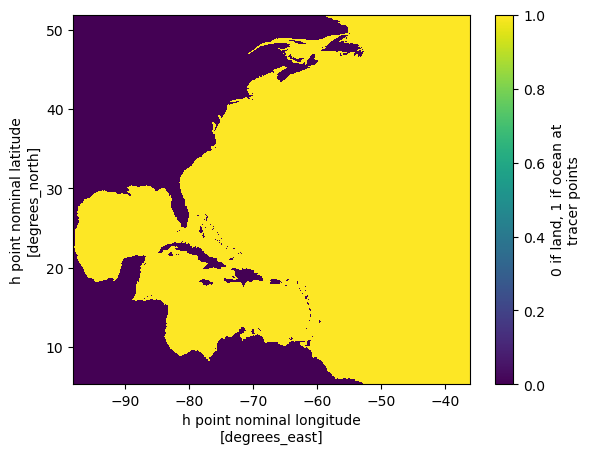

In [3]:
ds_static = xr.open_dataset('/Datasets.private/regional_mom6/ocean_static.nc')
da_lmask = ds_static.set_coords(['geolon','geolat']).wet
# da_lmask = da_lmask.where(da_lmask==1)
da_lmask.plot()

## Regional tercile

In [4]:
import numpy as np
# calculate the tercile (from Andrew)
forecast_dir = '/Datasets.private/regional_mom6/forehindcast_sst/forecasts'
iyear = 2022
imonth = 3
variable = 'tos'

# Lead bins to average forecasts in 
# (should match lead bins used for the historical data).
# [0, 3, 6, 9, 12] produces 3-month averages
lead_bins = [0, 3, 6, 9, 12]
lead_bin_label = np.arange(0,4)


# Open the new forecast, and average the forecast over the lead bins
new_forecast = (
    xr.open_dataset(forecast_dir+f'/{iyear}-{imonth:02d}/{variable}_regions_{iyear}-{imonth:02d}.nc')
    [variable]
    .groupby_bins('lead', lead_bins, labels=lead_bin_label, right=True)
    .mean('lead')
    .rename({'lead_bins': 'lead_bin'})
)


In [5]:
plot_regions = new_forecast.region

In [6]:
plot_regions

<xarray.DataArray 'region' (region: 8)>
array(['MAB', 'GOM', 'GB', 'SS_LME', 'NEUS_LME', 'SEUS_LME', 'NGOMEX',
       'SGOMEX'], dtype=object)
Coordinates:
  * region   (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
Attributes:
    comment:  LME or EPU over which data was averaged

In [7]:
new_forecast

<xarray.DataArray 'tos' (member: 10, lead_bin: 4, region: 8)>
array([[[17.282217 , 11.904381 , 11.626164 ,  8.9340315, 14.258431 ,
         26.512873 , 26.441177 , 27.976692 ],
        [25.29902  , 19.900246 , 18.69973  , 18.976177 , 21.696806 ,
         29.59848  , 30.650492 , 29.719498 ],
        [16.570822 , 11.395255 , 13.603011 , 10.011881 , 14.050453 ,
         24.742487 , 23.85832  , 26.549517 ],
        [10.660955 ,  6.6463203,  8.16852  ,  3.1811905,  8.733992 ,
         21.693146 , 19.03627  , 24.002518 ]],

       [[16.97711  , 11.955646 , 11.534297 ,  7.940432 , 14.067505 ,
         26.053507 , 26.887518 , 28.035202 ],
        [24.4758   , 19.689314 , 18.570768 , 18.633898 , 21.326609 ,
         29.40365  , 30.45817  , 29.405207 ],
        [15.470912 , 11.199107 , 13.460686 , 10.411433 , 13.5608015,
         25.163424 , 22.82473  , 26.991945 ],
        [10.189808 ,  6.9011307,  7.63375  ,  1.8824801,  8.361666 ,
         22.69223  , 18.69478  , 25.07544  ]],

       [[17.314074 , 12.785243 , 11.548007 ,  8.78539  , 14.500951 ,
         26.09279  , 26.53485  , 28.232552 ],
...
        [12.20595  ,  7.465537 , 10.0827465,  3.3585067,  9.995262 ,
         21.519382 , 18.42874  , 23.79732  ]],

       [[16.466919 , 10.81551  , 10.787002 ,  7.649235 , 13.340512 ,
         25.661005 , 25.896187 , 27.595621 ],
        [23.742876 , 18.817308 , 17.952261 , 18.294773 , 20.575333 ,
         29.103172 , 30.523962 , 29.453135 ],
        [16.919533 , 11.497842 , 13.05338  , 10.327697 , 14.203465 ,
         25.712204 , 24.506264 , 26.97606  ],
        [11.125914 ,  6.633609 ,  8.291015 ,  2.3665838,  8.946789 ,
         22.817425 , 20.0546   , 25.27486  ]],

       [[17.238585 , 11.751957 , 11.533832 ,  8.053136 , 14.070132 ,
         26.286108 , 26.10019  , 28.05115  ],
        [25.750296 , 20.019987 , 19.037424 , 18.589752 , 22.00088  ,
         29.640793 , 30.176584 , 29.506907 ],
        [16.552805 , 11.616127 , 13.779397 , 10.106705 , 14.147161 ,
         24.678259 , 22.657919 , 26.350523 ],
        [11.381525 ,  7.293335 ,  9.537437 ,  3.7427602,  9.647589 ,
         21.923382 , 18.431288 , 23.874695 ]]], dtype=float32)
Coordinates:
  * region    (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
  * member    (member) int64 0 1 2 3 4 5 6 7 8 9
  * lead_bin  (lead_bin) int64 0 1 2 3

In [8]:
from scipy.stats import norm as normal
# Build a normal distribution for each region and lead bin
# from the ensemble mean and standard deviation
mu = new_forecast.mean('member')
sig = new_forecast.std('member')
dist = normal(loc=mu, scale=sig)

In [9]:
# Open the historical data, which includes the historical forecast probabilities,
# the observed tercile,
# and the quantiles that define the model terciles
historical_dir = '/Datasets.private/regional_mom6/forehindcast_sst/historical_forecasts'
hist_data = xr.open_dataset(historical_dir+'/historical_terciles.nc').sel(imonth=imonth,region=plot_regions)

In [10]:
# Using normal distribution and pre-defined quantiles, find the probability for each tercile
f_low = xr.DataArray(dist.cdf(hist_data.q_lowmid), dims=mu.dims, coords=mu.coords)
f_high = 1 - xr.DataArray(dist.cdf(hist_data.q_midhigh), dims=mu.dims, coords=mu.coords)
f_mid = 1 - f_high - f_low

In [11]:
da_tercile = xr.concat([f_low,f_mid,f_high], "tercile")

In [12]:
da_tercile.sel(lead_bin=3).max(dim='tercile')

<xarray.DataArray (region: 8)>
array([0.5893741 , 0.47091983, 0.50620949, 0.4647092 , 0.5794309 ,
       0.40390689, 0.40941899, 0.46234935])
Coordinates:
  * region    (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
    lead_bin  int64 3

In [13]:
da_tercile.sel(lead_bin=3).argmax(dim='tercile')-1  # 1 in high tercile, 0 in mid tercile, -1 in low tercile

<xarray.DataArray (region: 8)>
array([1, 0, 1, 1, 1, 1, 0, 1])
Coordinates:
  * region    (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
    lead_bin  int64 3

In [14]:
da_tercile_plot = (da_tercile.sel(lead_bin=3).argmax(dim='tercile')-1)*da_tercile.sel(lead_bin=3).max(dim='tercile')

In [15]:
da_tercile_plot

<xarray.DataArray (region: 8)>
array([0.5893741 , 0.        , 0.50620949, 0.4647092 , 0.5794309 ,
       0.40390689, 0.        , 0.46234935])
Coordinates:
  * region    (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
    lead_bin  int64 3

In [16]:
da_tercile_plot

<xarray.DataArray (region: 8)>
array([0.5893741 , 0.        , 0.50620949, 0.4647092 , 0.5794309 ,
       0.40390689, 0.        , 0.46234935])
Coordinates:
  * region    (region) object 'MAB' 'GOM' 'GB' ... 'SEUS_LME' 'NGOMEX' 'SGOMEX'
    lead_bin  int64 3

In [17]:
da_mask_tercile = ds_lme['areacello'].copy()*0
da_mask_all = ds_lme['areacello'].copy()*0
for region in plot_regions.data:
    if region not in ['NEUS_LME']:
        # change boolean to 0,1
        print(region,da_tercile_plot.sel(region=region).data)
        da_mask = ds_lme[region].where(ds_lme[region],other=0)
        da_mask = da_mask.where(~da_mask,other=1)
        da_mask_all += da_mask

        da_mask = da_mask*da_tercile_plot.sel(region=region)
        da_mask_tercile += da_mask
        
da_mask_all = da_mask_all.where(da_mask_all==1)
da_mask_tercile = da_mask_tercile*da_mask_all

MAB 0.5893741044574621
GOM 0.0
GB 0.5062094904272114
SS_LME 0.46470920415810457
SEUS_LME 0.4039068909759289
NGOMEX 0.0
SGOMEX 0.462349350543096


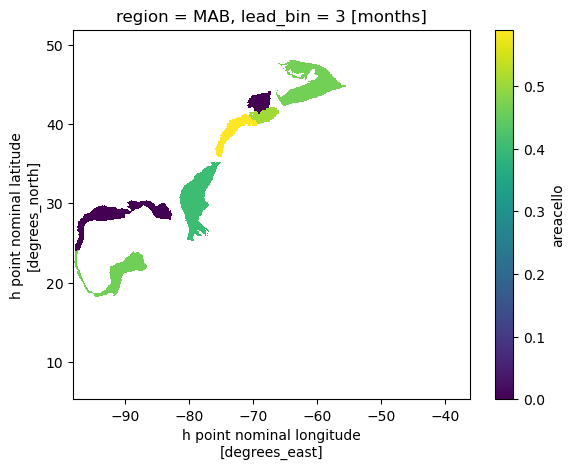

In [18]:
da_mask_tercile.plot()

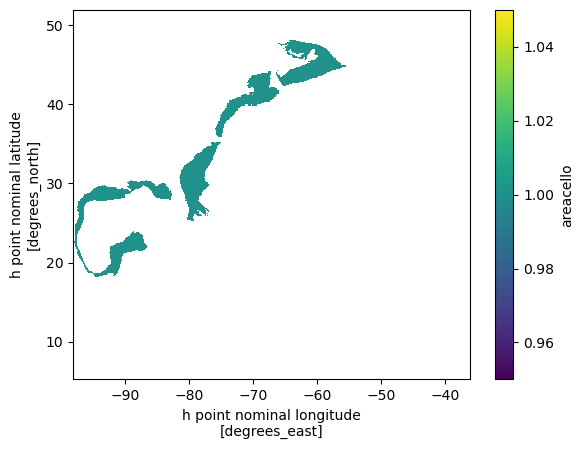

In [19]:
da_mask_all.plot()

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
ncolor = 18
RdYlBu = cm.get_cmap('RdYlBu', ncolor)
newRdYlBu = RdYlBu(range(ncolor))
white = np.array([255/255.,255/255.,255/255.,1.])
grey = np.array([237./255., 231./255., 225./255.,1.])
newRdYlBu[int((ncolor-1)/2),:] = grey
newRdYlBu[int((ncolor-1)/2)+1,:] = grey
newRdYlBu_r = newRdYlBu[::-1]
newRdYlBu_r = ListedColormap(newRdYlBu_r)


# newcolors = viridis(np.linspace(0, 1, 256))
# pink = np.array([248/256, 24/256, 148/256, 1])
# newcolors[:25, :] = pink
# newcmp = ListedColormap(newcolors)

# plot_examples([viridis, newcmp])

/tmp/ipykernel_3258702/2870439226.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  RdYlBu = cm.get_cmap('RdYlBu', ncolor)


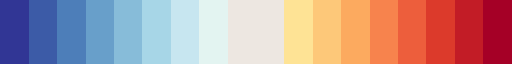

In [21]:
newRdYlBu_r

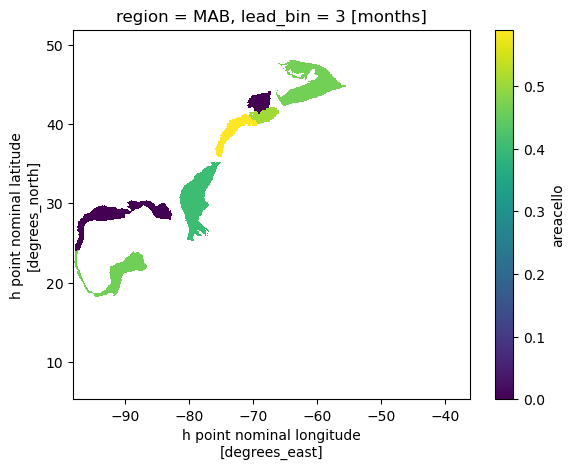

In [22]:
da_mask_tercile.plot()

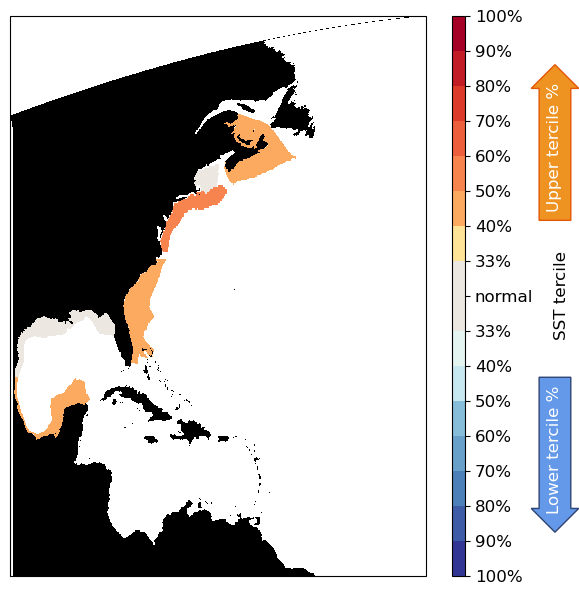

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
lon='geolon'
lat='geolat'
level = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.33,0,0.33,0.40,0.5,0.6,0.7,0.8,0.9,1]
clabel = []
for l in level:
    if l>0:
        clabel.append(f"{l*100:0.0f}%")
    elif l<0:
        clabel.append(f"{-l*100:0.0f}%")
    else:
        clabel.append("normal")
cmap = newRdYlBu_r
colorbar_labelname = 'SST tercile'

fig=plt.figure(2,figsize=(6.5,7))
ax2=fig.add_axes([0.12,0.1,1,0.8],projection=ccrs.PlateCarree(central_longitude=-60))
ax2.set_aspect('auto')



im=[da_mask_tercile.plot.pcolormesh(
            x=lon,
            y=lat,
            ax=ax2, 
            levels=level, 
            extend='neither', 
            cmap=cmap,
            transform=ccrs.PlateCarree(central_longitude=0)
        )]

im[0].colorbar.remove()
cbaxes=fig.add_axes([0.8,0.1,0.02,0.8])
cbar=fig.colorbar(im[0],cax=cbaxes,orientation='vertical')
cbar.set_ticks(level)
cbar.set_ticklabels(clabel)
cbar.ax.tick_params(labelsize=12,rotation=0) 
cbar.set_label(label=colorbar_labelname,size=12, labelpad=15)

imm=da_lmask.plot.pcolormesh(x=lon,
                            y=lat,
                            ax=ax2, 
                            levels=np.arange(0,1+1),
                            cmap='grey',
                            transform=ccrs.PlateCarree(central_longitude=0))
imm.colorbar.remove()

abovearrow = ax2.text(1.31, 0.65, "Upper tercile %",color='white',transform=ax2.transAxes,
            ha="center", va="bottom", rotation=90, size=12,
            bbox=dict(boxstyle="rarrow,pad=0.5",
                      fc="#EE9322", ec="#E55604", lw=1))

belowarrow = ax2.text(1.31, 0.34, "Lower tercile %",color='white',transform=ax2.transAxes,
            ha="center", va="top", rotation=90, size=12,
            bbox=dict(boxstyle="larrow,pad=0.5",
                      fc="#6499E9", ec="#2E4374", lw=1))


## Gridded tercile

In [24]:
import numpy as np
# calculate the tercile (from Andrew)
forecast_dir = '/Datasets.private/regional_mom6/forehindcast_sst/forecasts'
iyear = 2022
imonth = 3
variable = 'tos'

# Lead bins to average forecasts in 
# (should match lead bins used for the historical data).
# [0, 3, 6, 9, 12] produces 3-month averages
lead_bins = [0, 3, 6, 9, 12]
lead_bin_label = np.arange(0,4)
lead_bin_title = []


# Open the new forecast, and average the forecast over the lead bins
gridded_forecast = (
    xr.open_dataset(forecast_dir+f'/{iyear}-{imonth:02d}/{variable}_maps_{iyear}-{imonth:02d}.nc')
    [variable]
    .groupby_bins('lead', lead_bins, labels=lead_bin_label, right=True)
    .mean('lead')
    .rename({'lead_bins': 'lead_bin'})
)


In [25]:
from datetime import date
from dateutil.relativedelta import relativedelta
import cftime

cftime.datetime(iyear,imonth,1).year

btime = cftime.datetime(iyear,imonth,1)
forecasttime = []
for lead in range(0,12):
    new_date1 = (
        date.fromisoformat(f'{btime.year}-'+
                            f'{btime.month:02d}-'+
                            f'{1:02d}')
        +relativedelta(months=lead)
    )
    new_date2 = (
        date.fromisoformat(f'{btime.year}-'+
                            f'{btime.month:02d}-'+
                            f'{1:02d}')
        +relativedelta(months=lead+2)
    )
    forecasttime.append(f'{new_date1.strftime("%b")}-{new_date2.strftime("%b %Y")}')
    
mean_forecasttime = [forecasttime[idx] for idx in lead_bins[:-1]]
new_date = (
        date.fromisoformat(f'{btime.year}-'+
                            f'{btime.month:02d}-'+
                            f'{1:02d}')
    )
ini_time = f'{new_date.strftime("%b %Y")}'

In [26]:
gridded_forecast

<xarray.DataArray 'tos' (member: 10, lead_bin: 4, yh: 845, xh: 775)>
array([[[[       nan,        nan,        nan, ..., 27.79712  ,
          27.801012 , 27.80867  ],
         [       nan,        nan,        nan, ..., 27.834158 ,
          27.834547 , 27.838257 ],
         [       nan,        nan,        nan, ..., 27.856524 ,
          27.853941 , 27.85357  ],
         ...,
         [       nan,        nan,        nan, ...,  5.928186 ,
           5.939457 ,  5.9530525],
         [       nan,        nan,        nan, ...,  5.8894906,
           5.9103165,  5.9358444],
         [       nan,        nan,        nan, ...,  5.879378 ,
           5.9025216,  5.9362683]],

        [[       nan,        nan,        nan, ..., 28.196463 ,
          28.193213 , 28.199617 ],
         [       nan,        nan,        nan, ..., 28.179993 ,
          28.175776 , 28.175156 ],
         [       nan,        nan,        nan, ..., 28.161734 ,
          28.15713  , 28.149668 ],
...
         [       nan,        nan,        nan, ...,  7.317188 ,
           7.393864 ,  7.3945007],
         [       nan,        nan,        nan, ...,  7.2985024,
           7.3667817,  7.368324 ],
         [       nan,        nan,        nan, ...,  7.1339455,
           7.2330933,  7.2879415]],

        [[       nan,        nan,        nan, ..., 27.23093  ,
          27.229977 , 27.233934 ],
         [       nan,        nan,        nan, ..., 27.21873  ,
          27.221312 , 27.228905 ],
         [       nan,        nan,        nan, ..., 27.21123  ,
          27.216537 , 27.226093 ],
         ...,
         [       nan,        nan,        nan, ...,  5.1532493,
           5.19849  ,  5.2218165],
         [       nan,        nan,        nan, ...,  5.1444635,
           5.187334 ,  5.212952 ],
         [       nan,        nan,        nan, ...,  5.098875 ,
           5.143603 ,  5.177126 ]]]], dtype=float32)
Coordinates:
  * xh        (xh) float64 -98.0 -97.92 -97.84 -97.76 ... -36.24 -36.16 -36.08
  * yh        (yh) float64 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
  * member    (member) int64 0 1 2 3 4 5 6 7 8 9
  * lead_bin  (lead_bin) int64 0 1 2 3
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    standard_name:  sea_surface_temperature
    comment:        Not corrected for bias or drift

In [27]:
from scipy.stats import norm as normal
# Build a normal distribution for each region and lead bin
# from the ensemble mean and standard deviation
mu = gridded_forecast.mean('member')
sig = gridded_forecast.std('member')
dist = normal(loc=mu, scale=sig)

/home/chsu/mambaforge/envs/cefi-folium/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [28]:
# Open the historical data, which includes the historical forecast probabilities,
# the observed tercile,
# and the quantiles that define the model terciles
historical_dir = '/Datasets.private/regional_mom6/forehindcast_sst/historical_forecasts'
gridded_hindcast_tercile = xr.open_dataset(historical_dir+f'/forecast_quantiles_i{imonth:02d}.nc')
gridded_hindcast_tercile = (
    gridded_hindcast_tercile
    .groupby_bins('lead', lead_bins, labels=lead_bin_label, right=True)
    .mean('lead')
    .rename({'lead_bins': 'lead_bin'})
)

In [29]:
gridded_hindcast_tercile

<xarray.Dataset>
Dimensions:     (xh: 775, yh: 845, lead_bin: 4)
Coordinates:
  * xh          (xh) float64 -98.0 -97.92 -97.84 -97.76 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
  * lead_bin    (lead_bin) int64 0 1 2 3
Data variables:
    f_lowmid    (lead_bin, yh, xh) float32 nan nan nan nan ... 4.954 4.987 5.01
    f_midhigh   (lead_bin, yh, xh) float32 nan nan nan nan ... 5.177 5.203 5.232
    init_month  (lead_bin) float64 3.0 3.0 3.0 3.0

In [30]:
# Using normal distribution and pre-defined quantiles, find the probability for each tercile
f_low = xr.DataArray(dist.cdf(gridded_hindcast_tercile.f_lowmid), dims=mu.dims, coords=mu.coords)
f_high = 1 - xr.DataArray(dist.cdf(gridded_hindcast_tercile.f_midhigh), dims=mu.dims, coords=mu.coords)
f_mid = 1 - f_high - f_low

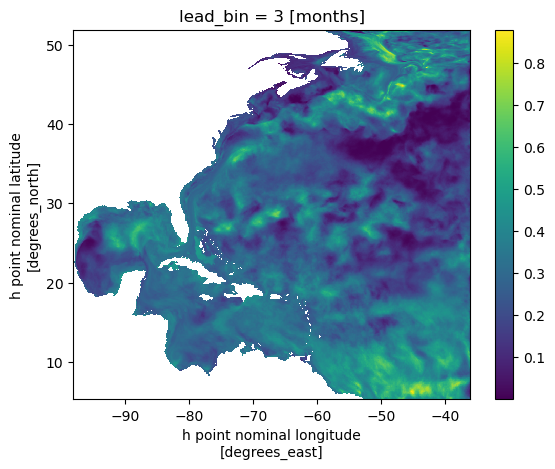

In [31]:
f_mid.isel(lead_bin=3).plot()

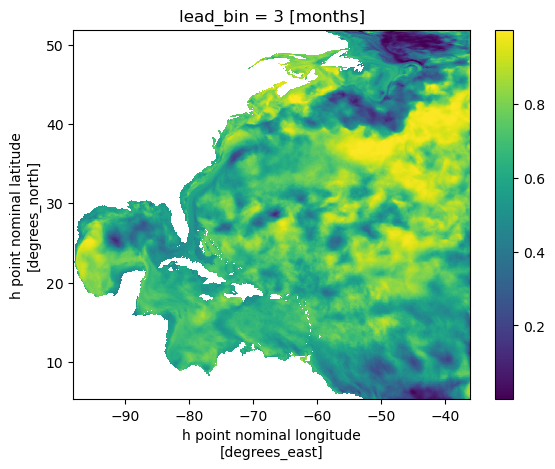

In [32]:
f_high.isel(lead_bin=3).plot()

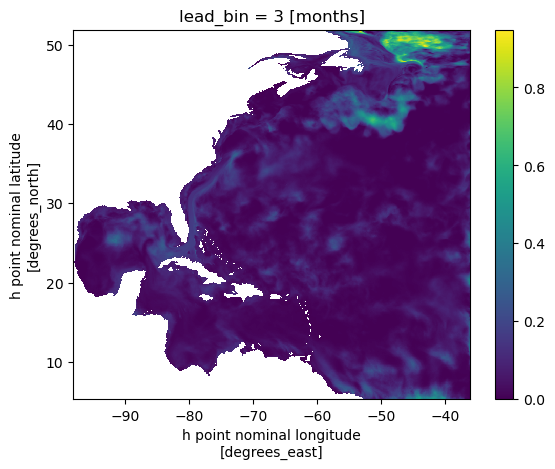

In [33]:
f_low.isel(lead_bin=3).plot()

In [34]:
import pandas as pd
# ds_gridded_tercile = xr.Dataset()
da_gridded_tercile = xr.concat([f_low,f_mid,f_high], pd.Index([-1,0,1], name="tercile"))
# ds_gridded_tercile['all_tercile_prob'] = da_gridded_tercile
da_gridded_tercile_plot = da_gridded_tercile.idxmax(dim='tercile',fill_value=np.nan)*da_gridded_tercile.max(dim='tercile')

In [35]:
da_gridded_tercile_plot

<xarray.DataArray (lead_bin: 4, yh: 845, xh: 775)>
array([[[        nan,         nan,         nan, ...,  0.69939591,
          0.69637696,  0.72750286],
        [        nan,         nan,         nan, ...,  0.71329854,
          0.72750179,  0.73100704],
        [        nan,         nan,         nan, ...,  0.69813636,
          0.7147403 ,  0.72000684],
        ...,
        [        nan,         nan,         nan, ..., -0.39246205,
         -0.40930862, -0.41764668],
        [        nan,         nan,         nan, ..., -0.40651289,
         -0.4124066 , -0.41756296],
        [        nan,         nan,         nan, ..., -0.40039516,
         -0.41059562, -0.42365169]],

       [[        nan,         nan,         nan, ...,  0.70673305,
          0.69381264,  0.67835072],
        [        nan,         nan,         nan, ...,  0.6921326 ,
          0.68294117,  0.67530549],
        [        nan,         nan,         nan, ...,  0.66541485,
          0.66170521,  0.65543298],
...
        [        nan,         nan,         nan, ...,  0.60784745,
          0.59712021,  0.58383482],
        [        nan,         nan,         nan, ...,  0.60979727,
          0.61109466,  0.59437321],
        [        nan,         nan,         nan, ...,  0.60729775,
          0.61101715,  0.60153922]],

       [[        nan,         nan,         nan, ...,  0.63725544,
          0.65373785,  0.66123645],
        [        nan,         nan,         nan, ...,  0.6790854 ,
          0.70909882,  0.74327229],
        [        nan,         nan,         nan, ...,  0.71446194,
          0.76109021,  0.81496921],
        ...,
        [        nan,         nan,         nan, ...,  0.72096501,
          0.69018073,  0.6746592 ],
        [        nan,         nan,         nan, ...,  0.73894553,
          0.72025017,  0.68794488],
        [        nan,         nan,         nan, ...,  0.76478694,
          0.76002663,  0.72995784]]])
Coordinates:
  * xh        (xh) float64 -98.0 -97.92 -97.84 -97.76 ... -36.24 -36.16 -36.08
  * yh        (yh) float64 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
  * lead_bin  (lead_bin) int64 0 1 2 3

Text(0.5, 1.0, 'Dec-Feb 2023 Forecast \n Mar 2022 Initialized')

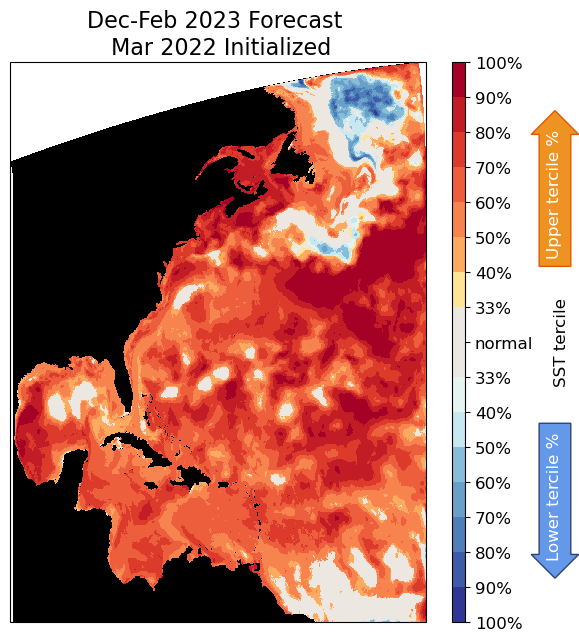

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
lead_bin = 3 

ds_gridded_tercile_plot=xr.Dataset()
ds_gridded_tercile_plot['tercile_plot'] = da_gridded_tercile_plot
ds_gridded_tercile_plot['mask'] = da_lmask


lon='geolon'
lat='geolat'
level = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.33,0,0.33,0.40,0.5,0.6,0.7,0.8,0.9,1]
clabel = []
for l in level:
    if l>0:
        clabel.append(f"{l*100:0.0f}%")
    elif l<0:
        clabel.append(f"{-l*100:0.0f}%")
    else:
        clabel.append("normal")
cmap = newRdYlBu_r
colorbar_labelname = 'SST tercile'

fig=plt.figure(2,figsize=(6.5,7))
ax2=fig.add_axes([0.12,0.1,1,0.8],projection=ccrs.PlateCarree(central_longitude=-60))
ax2.set_aspect('auto')


im=[ds_gridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).plot.pcolormesh(
            x=lon,
            y=lat,
            ax=ax2, 
            levels=level, 
            extend='neither', 
            cmap=cmap,
            transform=ccrs.PlateCarree(central_longitude=0)
        )]

im[0].colorbar.remove()
cbaxes=fig.add_axes([0.8,0.1,0.02,0.8])
cbar=fig.colorbar(im[0],cax=cbaxes,orientation='vertical')
cbar.set_ticks(level)
cbar.set_ticklabels(clabel)
cbar.ax.tick_params(labelsize=12,rotation=0) 
cbar.set_label(label=colorbar_labelname,size=12, labelpad=15)

imm=ds_gridded_tercile_plot['mask'].plot.pcolormesh(x=lon,
                            y=lat,
                            ax=ax2, 
                            levels=np.arange(0,1+1),
                            cmap='grey',
                            transform=ccrs.PlateCarree(central_longitude=0))
imm.colorbar.remove()

abovearrow = ax2.text(1.31, 0.65, "Upper tercile %",color='white',transform=ax2.transAxes,
            ha="center", va="bottom", rotation=90, size=12,
            bbox=dict(boxstyle="rarrow,pad=0.5",
                      fc="#EE9322", ec="#E55604", lw=1))

belowarrow = ax2.text(1.31, 0.34, "Lower tercile %",color='white',transform=ax2.transAxes,
            ha="center", va="top", rotation=90, size=12,
            bbox=dict(boxstyle="larrow,pad=0.5",
                      fc="#6499E9", ec="#2E4374", lw=1))

ax2.set_title(f'{mean_forecasttime[lead_bin]} Forecast \n {ini_time} Initialized',fontsize=16)


In [37]:
import folium

In [155]:
m = folium.Map(location=[lats.mean(), lons.mean()], zoom_start=5)
m

In [38]:
da_gridded_tercile_plot.sel(lead_bin=lead_bin).data.shape

(845, 775)

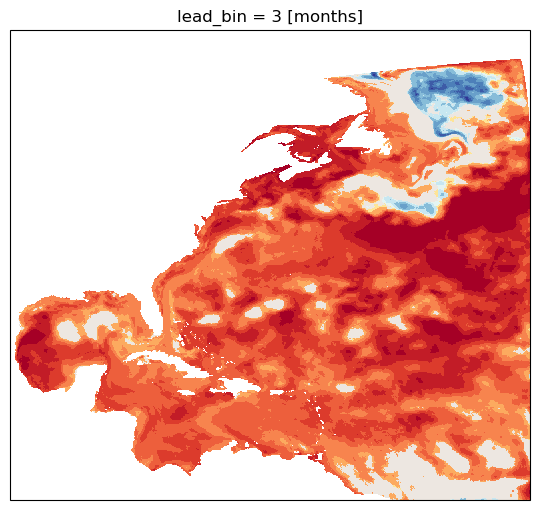

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
lead_bin = 3 

# ds_gridded_tercile_plot=xr.Dataset()
# ds_gridded_tercile_plot['tercile_plot'] = da_gridded_tercile_plot


lon='geolon'
lat='geolat'
level = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.33,0,0.33,0.40,0.5,0.6,0.7,0.8,0.9,1]
clabel = []
for l in level:
    if l>0:
        clabel.append(f"{l*100:0.0f}%")
    elif l<0:
        clabel.append(f"{-l*100:0.0f}%")
    else:
        clabel.append("normal")
cmap = newRdYlBu_r
colorbar_labelname = 'SST tercile'

fig=plt.figure(2,figsize=(6.5,7))
ax2=fig.add_axes([0.12,0.1,1,0.8],projection=ccrs.PlateCarree(central_longitude=-60))
bbox = [float(ds_gridded_tercile_plot.geolon.min().data),
        float(ds_gridded_tercile_plot.geolon.max().data),
        float(ds_gridded_tercile_plot.geolat.min().data),
        float(ds_gridded_tercile_plot.geolat.max().data)]
ax2.set_extent(bbox)

im=ds_gridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).plot.pcolormesh(
    x=lon,
    y=lat,
    ax=ax2, 
    levels=level, 
    extend='neither', 
    cmap=cmap,
    transform=ccrs.PlateCarree(central_longitude=0))

im.colorbar.remove()

fig.savefig('./figures/tercile.png', transparent=True)


In [40]:
import numpy as np
from PIL import Image, ImageChops


def trim(img):
    border = Image.new(img.mode, img.size, img.getpixel((0, 0)))
    diff = ImageChops.difference(img, border)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        img = img.crop(bbox)
    return np.array(img)

img = Image.open("./figures/tercile.png")
img = trim(img)


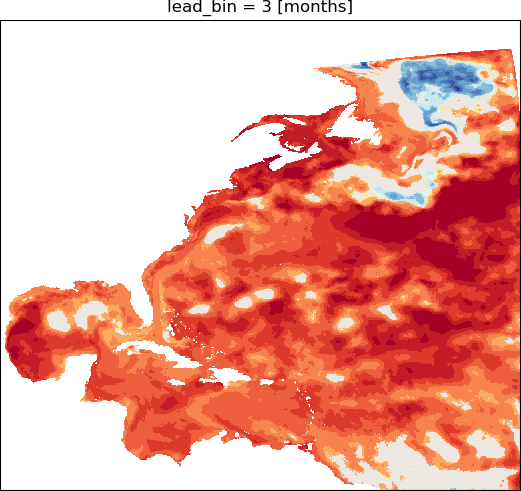

In [41]:
mapa = folium.Map(location=[float(ds_gridded_tercile_plot.geolat.mean().data), float(ds_gridded_tercile_plot.geolon.mean().data)], zoom_start=3)

folium.raster_layers.ImageOverlay(
    image=img,
    bounds=[[float(ds_gridded_tercile_plot.geolat.min().data),
             float(ds_gridded_tercile_plot.geolon.min().data)],
            [float(ds_gridded_tercile_plot.geolat.max().data),
             float(ds_gridded_tercile_plot.geolon.max().data)]],
    # mercator_project=True,
    opacity=0.25).add_to(mapa)

mapa


In [42]:
import xesmf as xe
ds_regridded_tercile_plot = ds_gridded_tercile_plot.copy()
ds_regridded_tercile_plot = ds_regridded_tercile_plot.rename({'xh':'lon','yh':'lat'})
ds_gridded_tercile_plot = ds_gridded_tercile_plot.rename({'geolon':'lon','geolat':'lat'})

# regridder = xe.Regridder(ds_gridded_tercile_plot, ds_regridded_tercile_plot, "bilinear")

In [47]:
ds_regridded_tercile_plot = ds_regridded_tercile_plot.drop_vars(['geolon','geolat'])

In [48]:
regridder = xe.Regridder(ds_gridded_tercile_plot, ds_regridded_tercile_plot, "bilinear")

In [50]:
ds_regridded_tercile_plot['tercile_plot'] = regridder(ds_gridded_tercile_plot['tercile_plot'])

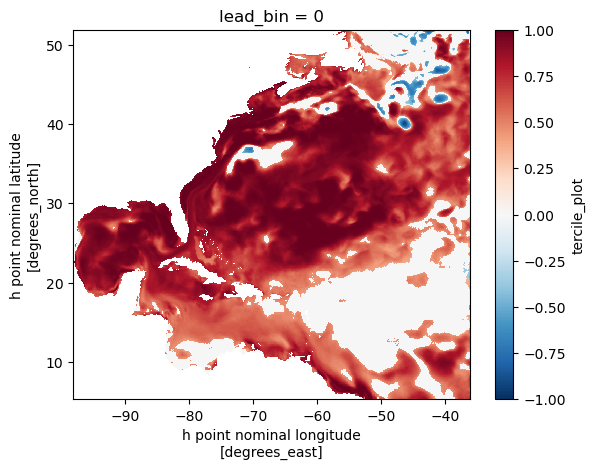

In [52]:
ds_regridded_tercile_plot['tercile_plot'].isel(lead_bin=0).plot()

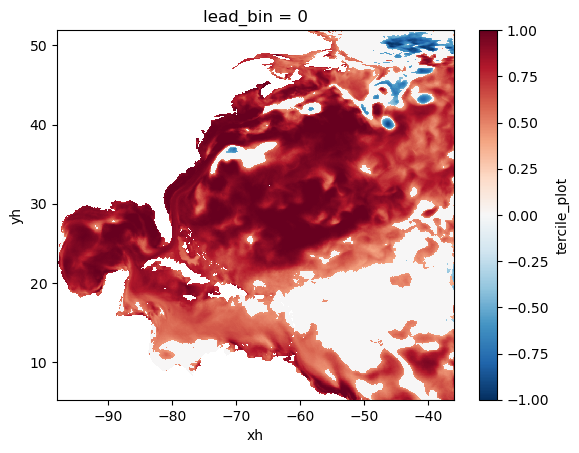

In [54]:
ds_gridded_tercile_plot['tercile_plot'].isel(lead_bin=0).plot()

In [55]:
ds_regridded_tercile_plot

<xarray.Dataset>
Dimensions:       (lon: 775, lat: 845, lead_bin: 4)
Coordinates:
  * lon           (lon) float64 -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * lat           (lat) float64 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * lead_bin      (lead_bin) int64 0 1 2 3
Data variables:
    tercile_plot  (lead_bin, lat, lon) float64 nan nan nan nan ... nan nan nan
    mask          (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [128]:
import pyproj

def lonlat_to_mercator(lon, lat):
    # Define the coordinate transformation from EPSG:4326 (WGS 84) to EPSG:3857 (Web Mercator)
    wgs84 = pyproj.Proj(init='epsg:4326')
    mercator = pyproj.Proj(init='epsg:3857')
    
    # Transform the input longitude and latitude to Mercator projection
    mercator_x, mercator_y = pyproj.transform(wgs84, mercator, lon, lat)
    
    return mercator_x, mercator_y


In [149]:
ds_regridded_tercile_plot['lon'] = ds_regridded_tercile_plot.lon.data+360.

In [131]:
lons, lats = np.meshgrid(ds_regridded_tercile_plot.lon.data, ds_regridded_tercile_plot.lat.data)

In [133]:
x,y = lonlat_to_mercator(lons, lats)
bbox = [x.min(), x.max(), y.min(), y.max()]

/home/chsu/mambaforge/envs/cefi-folium/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/chsu/mambaforge/envs/cefi-folium/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_3258702/3777668152.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

In [143]:
def make_map(bbox, projection=ccrs.Mercator()):
    fig, ax = plt.subplots(
        figsize=(8, 6),
        subplot_kw={'projection': projection}
    )
    # ax.set_extent(bbox)
    # ax.add_feature(LAND, facecolor='0.25')
    ax.coastlines(resolution='50m')
    return fig, ax

In [139]:
ds_regridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).data

array([[       nan,        nan,        nan, ..., 0.63725544, 0.65373785,
        0.66123645],
       [       nan,        nan,        nan, ..., 0.6790854 , 0.70909882,
        0.74327229],
       [       nan,        nan,        nan, ..., 0.71446194, 0.76109021,
        0.81496921],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [ ]:
fig, ax = make_map(bbox=bbox)
ax.pcolormesh(x, y, ds_regridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).data, transform=ccrs.PlateCarree())

In [73]:
[[float(ds_regridded_tercile_plot.lat.min().data),
             float(ds_regridded_tercile_plot.lon.min().data)],
            [float(ds_regridded_tercile_plot.lat.max().data),
             float(ds_regridded_tercile_plot.lon.max().data)]]

[[5.272542476654053, -98.0], [51.93296432495117, -36.079986572265625]]

In [74]:
source_extent

[-98.0, -36.079986572265625, 5.272542476654053, 51.93296432495117]

In [106]:
def sample_data(shape=(73, 145)):
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data


lon, lat, data = sample_data(shape=(73, 145))

In [120]:
import matplotlib
cm = matplotlib.cm.get_cmap("cubehelix")

normed_data = (data - data.min()) / (data.max() - data.min())
colored_data = cm(normed_data)

/tmp/ipykernel_3258702/1274602589.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap("cubehelix")



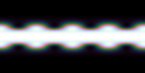

In [122]:
m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    mercator_project=True,
    origin="lower",
    opacity=0.25,
).add_to(m)


m


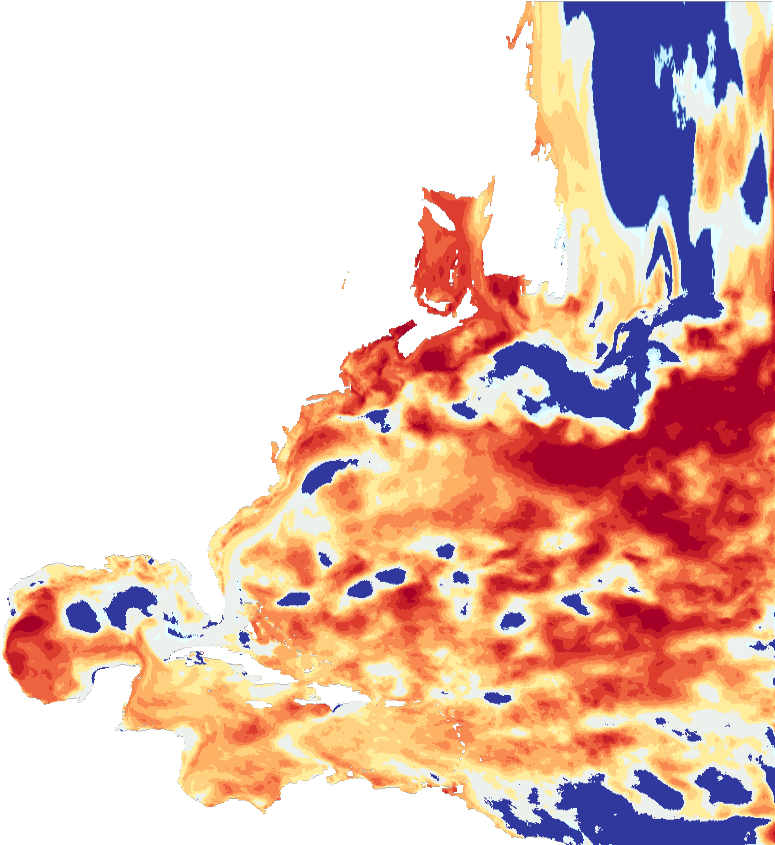

In [161]:
import cartopy.crs as ccrs
from cartopy.img_transform import warp_array

lead_bin = 3
# source_extent = [float(ds_regridded_tercile_plot.lon.min().data),
#                  float(ds_regridded_tercile_plot.lon.max().data),
#                  float(ds_regridded_tercile_plot.lat.min().data),
#                  float(ds_regridded_tercile_plot.lat.max().data)]
cm = newRdYlBu_r
colored_data = cm(ds_regridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).data)


# new_data = warp_array(
#     colored_data,
#     target_proj=ccrs.GOOGLE_MERCATOR,
#     source_proj=ccrs.PlateCarree(),
#     target_res=ds_regridded_tercile_plot['tercile_plot'].sel(lead_bin=lead_bin).data.shape,
#     source_extent=source_extent,
#     target_extent=None,
#     mask_extrapolated=True,
# )


fm = folium.Map(location=[float(ds_regridded_tercile_plot.lat.mean().data), float(ds_regridded_tercile_plot.lon.mean().data)], tiles="Cartodb Positron", zoom_start=4)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[float(ds_regridded_tercile_plot.lat.min().data),
             float(ds_regridded_tercile_plot.lon.min().data)],
            [float(ds_regridded_tercile_plot.lat.max().data),
             float(ds_regridded_tercile_plot.lon.max().data)]],
    mercator_project=True,
    origin="lower",
    opacity=0.55,
).add_to(fm)

# folium.raster_layers.ImageOverlay(
#     image=new_data[0],
#     bounds=[[new_data[1][2],
#              new_data[1][0]],
#             [new_data[1][3],
#              new_data[1][1]]],
#     # mercator_project=True,
#     # pixelated=False,
#     opacity=0.55,
# ).add_to(m)

fm

In [101]:
[[float(ds_regridded_tercile_plot.lat.min().data),
             float(ds_regridded_tercile_plot.lon.min().data)],
            [float(ds_regridded_tercile_plot.lat.max().data),
             float(ds_regridded_tercile_plot.lon.max().data)]]

[[5.272542476654053, -98.0], [51.93296432495117, -36.079986572265625]]

In [97]:
new_data[1]

[-20037508.342789244,
 20037508.342789244,
 -20037508.342789248,
 20037508.342789248]

In [89]:
new_data[1]

[-20037508.342789244,
 20037508.342789244,
 -15496570.739723718,
 18764656.231380563]

In [ ]:
ds_gridded_tercile_plot.xh

In [ ]:
# #!/usr/bin/python
# import cgi
# import folium

# # Get user input from the CGI form
# form = cgi.FieldStorage()
# location = form.getvalue('location')  # Example: Get user-selected location from the form

# # Create a Folium map based on user input
# m = folium.Map(location=[0, 0], zoom_start=10)  # Example: Create a map centered at a specified location

# # Convert the Folium map to HTML
# map_html = m._repr_html_()

# # Generate the HTML response
# print("Content-type: text/html\n")  # Required HTTP header
# print("<html>")
# print("<head><title>Interactive Map</title></head>")
# print("<body>")
# print("<h1>Interactive Map</h1>")
# print("<p>User-selected location: {0}</p>".format(location))
# print(map_html)  # Insert the Folium map HTML
# print("</body>")
# print("</html>")
